### Import Dependencies

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading all data

In [115]:
df = pd.read_csv("../Resources/emissions_since1961_total_data.csv")

### Initial Exploration

In [116]:
df.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,NaN,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,NaN,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,NaN,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,NaN,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,NaN,11388000,10.638962,0.121


In [117]:
# How many and which countries are in our dataset?
print(len(df['country'].unique()))
print(df['country'].unique())

46
['Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'China' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Korea'
 'Romania' 'Russia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'USA' 'Global']


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2806 non-null   object 
 1   country_code  2806 non-null   object 
 2   year          2806 non-null   int64  
 3   total         2806 non-null   float64
 4   coal          2777 non-null   float64
 5   oil           2777 non-null   float64
 6   gas           2777 non-null   float64
 7   cement        2776 non-null   float64
 8   flaring       2777 non-null   float64
 9   other         1530 non-null   float64
 10  population    2806 non-null   int64  
 11  per_capita    2806 non-null   float64
 12  temp_change   2385 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 285.1+ KB


### Initial Exploration Notes
    1. Country and county_code refer to the same thing
    2. Country is a categorical variable so we will need to encode it to be numerical
        - Once this is done we can drop both country and country_code
    3. The coal, oil, gas, cement, flaring, other, and temp_change columns are missing values
        - We will need to remove the rows missing temp_change values since it is our target variable

### Further Exploration

In [119]:
# Which countries are missing coal data?
df[df['coal'].isnull()]["country"].unique()

array(['Liechtenstein'], dtype=object)

In [120]:
# It appears almost all of our missing values from coal, oil, gas, cement, and flaring are from Liechtenstein
# Because there are too many values missing in these rows, we will drop them
df[(df['country'] == 'Liechtenstein') & df['coal'].isnull() == True]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1464,Liechtenstein,LIE,1961,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16834,0.0,1.057
1465,Liechtenstein,LIE,1962,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17221,0.0,-0.484
1466,Liechtenstein,LIE,1963,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17625,0.0,-0.775
1467,Liechtenstein,LIE,1964,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18058,0.0,0.060
1468,Liechtenstein,LIE,1965,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18500,0.0,-0.834
1469,Liechtenstein,LIE,1966,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18957,0.0,0.414
1470,Liechtenstein,LIE,1967,0.0,NaN,NaN,NaN,NaN,NaN,NaN,19467,0.0,0.549
1471,Liechtenstein,LIE,1968,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20011,0.0,0.018
1472,Liechtenstein,LIE,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20558,0.0,-0.012
1473,Liechtenstein,LIE,1970,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21089,0.0,-0.550


In [121]:
# Where is the other missing value in cement?
df[df['cement'].isnull()]["country"].unique()

array(['Iceland', 'Liechtenstein'], dtype=object)

In [122]:
# The last missing value from cement is in Iceland 2021
df[(df['country'] == 'Iceland') & (df['cement'].isnull() == True)]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1158,Iceland,ISL,2021,3.374964,0.667573,2.526131,0.0002,NaN,0.174873,0.006187,372520,9.113272,0.993


In [123]:
# The cement values have been 0 since 2012, so we can fill this value in as 0 too. 
df[(df['country'] == 'Iceland') & (df['year'] > 2010)]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1148,Iceland,ISL,2011,3.494164,0.639488,2.652413,0.000161,0.019647,0.179512,0.002943,319014,10.943442,1.026
1149,Iceland,ISL,2012,3.490870,0.658973,2.655749,0.000041,0.000000,0.172050,0.004056,320716,10.875697,0.748
1150,Iceland,ISL,2013,3.480080,0.661003,2.642490,0.000062,0.000000,0.173138,0.003387,323764,10.740192,0.776
1151,Iceland,ISL,2014,3.436352,0.625165,2.625463,0.000148,0.000000,0.182954,0.002622,327386,10.488067,1.737
1152,Iceland,ISL,2015,3.533853,0.661181,2.705333,0.000182,0.000000,0.163135,0.004022,330815,10.674359,0.494
1153,Iceland,ISL,2016,3.485184,0.660089,2.672440,0.000080,0.000000,0.148961,0.003613,335439,10.382613,1.485
1154,Iceland,ISL,2017,3.601620,0.693221,2.758626,0.000048,0.000000,0.146479,0.003247,343400,10.481037,1.770
1155,Iceland,ISL,2018,3.658953,0.715029,2.783351,0.000032,0.000000,0.156462,0.004080,352721,10.366893,0.892
1156,Iceland,ISL,2019,3.546263,0.684012,2.692315,0.000227,0.000000,0.163106,0.006603,360563,9.829598,1.396
1157,Iceland,ISL,2020,3.328876,0.667573,2.480043,0.000200,0.000000,0.174873,0.006187,366463,9.078694,0.851


In [124]:
# What about the values missing from other? 
# It seems almost every country is missing other data.
df[df['other'].isnull()]["country"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'South Korea',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Global'],
      dtype=object)

In [125]:
# Let's look at a few and see where the values are missing
# missing from 1961 to 1989
df[(df['country'] == 'Australia') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype=int64)

In [126]:
# These are also missing from 1961 to 1989
df[(df['country'] == 'Finland') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype=int64)

In [127]:
# The same trend can be seen here.
# It's possible whatever the other column is measuring either didn't exist or wasn't measured yet for most countries
# Rather than removing all of these rows, we might instead assume their values were 0 and fill them in as such
df[(df['country'] == 'Ukraine') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype=int64)

In [128]:
# The final missing values to look into are from temp_change
# Lets look at which countries are missing values and how many
# While we are missing about half of the target values for these countries for now we will only remove these rows
    # However, it may be better to simply remove these countries from the dataset
for country in df[df['temp_change'].isnull()]["country"].unique():
    print(country)
    print(61 - len(df[(df['country'] == country) & (df['temp_change'].isnull())]))
    print("--------------------")

Belarus
30
--------------------
Belgium
22
--------------------
Croatia
30
--------------------
Czech Republic
29
--------------------
Estonia
30
--------------------
Kazakhstan
30
--------------------
Latvia
30
--------------------
Lithuania
30
--------------------
Luxembourg
22
--------------------
Russia
30
--------------------
Slovakia
29
--------------------
Slovenia
30
--------------------
Ukraine
30
--------------------


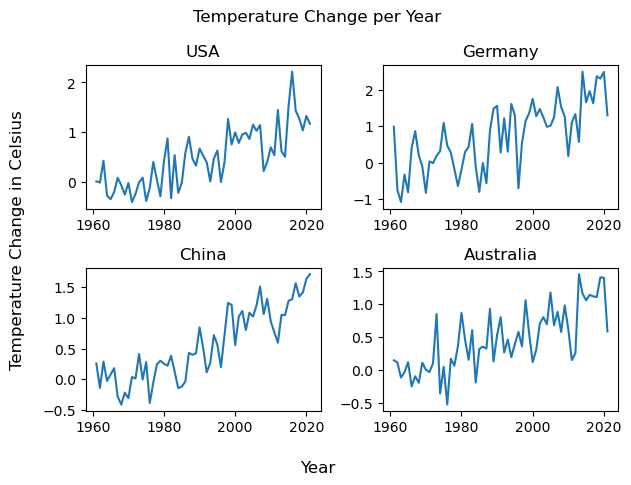

In [129]:
# Finally, let's look at a plot of temperature change vs year for a few countries to see what our target looks like
# As we can see the values bounce up and down (perhaps in some pattern), so the variance and also RMSE will be higher
fig, axs = plt.subplots(2, 2)

USA = df[df['country'] == 'USA']
Germany = df[df['country'] == 'Germany']
China = df[df['country'] == 'China']
Australia = df[df['country'] == 'Australia']

axs[0,0].plot(USA['year'], USA['temp_change'])
axs[0,0].set_title("USA")

axs[0,1].plot(Germany['year'], Germany['temp_change'])
axs[0,1].set_title("Germany")

axs[1,0].plot(China['year'], China['temp_change'])
axs[1,0].set_title("China")

axs[1,1].plot(Australia['year'], Australia['temp_change'])
axs[1,1].set_title("Australia")

fig.suptitle("Temperature Change per Year")
fig.supxlabel('Year')
fig.supylabel('Temperature Change in Celsius')
plt.tight_layout()
plt.show()

### Additional Notes
    1. Maybe I should remove the countries that were missing about half their target values
    2. Maybe I should remove the other column that's missing almost half it's values

In [179]:
# Remove the countries that were missing about half their target values
df_temp = df[~df['country'].isin(df[df['temp_change'].isnull()]["country"].unique())]

# Remove the rows where coal (and oil, gas, cement, and flaring) is null
df_dropped = df_temp[df_temp['coal'].notnull()]

### Data Cleaning

In [130]:
# Remove the rows where temp change is null
df_temp = df[df['temp_change'].notnull()]

# Remove the rows where coal (and oil, gas, cement, and flaring) is null
df_dropped = df_temp[df_temp['coal'].notnull()]

In [180]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       1984 non-null   object 
 1   country_code  1984 non-null   object 
 2   year          1984 non-null   int64  
 3   total         1984 non-null   float64
 4   coal          1984 non-null   float64
 5   oil           1984 non-null   float64
 6   gas           1984 non-null   float64
 7   cement        1983 non-null   float64
 8   flaring       1984 non-null   float64
 9   other         1114 non-null   float64
 10  population    1984 non-null   int64  
 11  per_capita    1984 non-null   float64
 12  temp_change   1984 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 217.0+ KB


In [220]:
# Fill in the missing values from other and cement as 0
# Or I could fill in the other column with mean
#df_filled = df_dropped.fillna(value={'other': df_dropped.groupby('country')['other'].transform('mean'),
#                                    'cement': 0})

df_filled = df_dropped.fillna(value={'other': 0,
                                    'cement': 0})

In [228]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       1984 non-null   object 
 1   country_code  1984 non-null   object 
 2   year          1984 non-null   int64  
 3   total         1984 non-null   float64
 4   coal          1984 non-null   float64
 5   oil           1984 non-null   float64
 6   gas           1984 non-null   float64
 7   cement        1984 non-null   float64
 8   flaring       1984 non-null   float64
 9   other         1984 non-null   float64
 10  population    1984 non-null   int64  
 11  per_capita    1984 non-null   float64
 12  temp_change   1984 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 281.5+ KB


In [229]:
# Encode the countries. Because the number value matters we need the countries to be sorted in some way.
# Therefore they will be sorted by the total emissions column from 2021
country_encoding = {}
num = 1
for country in df_filled[df_filled['year'] == 2021].sort_values(by='total')['country']:
    country_encoding[country] = num
    num += 1

In [230]:
country_encoding

{'Liechtenstein': 1,
 'Malta': 2,
 'Iceland': 3,
 'Cyprus': 4,
 'Denmark': 5,
 'New Zealand': 6,
 'Switzerland': 7,
 'Sweden': 8,
 'Ireland': 9,
 'Finland': 10,
 'Portugal': 11,
 'Norway': 12,
 'Bulgaria': 13,
 'Hungary': 14,
 'Greece': 15,
 'Austria': 16,
 'Romania': 17,
 'Netherlands': 18,
 'Spain': 19,
 'France': 20,
 'Poland': 21,
 'Italy': 22,
 'United Kingdom': 23,
 'Australia': 24,
 'Turkey': 25,
 'Brazil': 26,
 'Canada': 27,
 'South Korea': 28,
 'Germany': 29,
 'Japan': 30,
 'USA': 31,
 'China': 32,
 'Global': 33}

In [231]:
# Apply this encoding to create a new numerical column for the countries - called country_num
df_filled['country_num'] = df_filled['country'].apply(lambda x: country_encoding[x])

In [232]:
df_filled.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change,country_num
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,3.543319,10483000,8.614547,0.151,24
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,3.543319,10742000,8.852126,0.118,24
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,3.543319,10950000,9.245287,-0.111,24
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,3.543319,11167000,9.780775,-0.029,24
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,3.543319,11388000,10.638962,0.121,24


In [233]:
# If I get rid of other column
# It seems like dropping or keeping the other column didn't make much of a difference (nor did how I fill values in)
df_final = df_filled[['country_num', 'year', 'total', 'coal', 'oil', 
                      'gas', 'cement', 'flaring', 'population', 
                      'per_capita', 'temp_change']]

In [234]:
# Make country_num the first column and get rid of the categorical country and country_code columns
df_final = df_filled[['country_num', 'year', 'total', 'coal', 'oil', 
                      'gas', 'cement', 'flaring', 'other', 'population', 
                      'per_capita', 'temp_change']]

In [235]:
df_final.head()

,country_num,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,24,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,3.543319,10483000,8.614547,0.151
1,24,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,3.543319,10742000,8.852126,0.118
2,24,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,3.543319,10950000,9.245287,-0.111
3,24,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,3.543319,11167000,9.780775,-0.029
4,24,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,3.543319,11388000,10.638962,0.121


In [236]:
# Create the train and test sets
# Since our data is based on years we want the training set to be before 2012 and the test set since then (10 years)
X_train = df_final[df_final['year'] < 2012].drop(columns='temp_change')
X_test = df_final[df_final['year'] >= 2012].drop(columns='temp_change')
y_train = df_final[df_final['year'] < 2012]['temp_change']
y_test = df_final[df_final['year'] >= 2012]['temp_change']

### Supervised Machine Learning - Regression

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [238]:
# Scale all of the data, so large values don't cover up smaller ones
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [239]:
# Create a Linear Regression model, train, and predict
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)

In [240]:
# Calculate RMSE
sqrt(mean_squared_error(y_test, y_pred))

0.5983601561974574

In [241]:
# Create a Random Forest Regression model, train, and predict
tree = RandomForestRegressor()
tree.fit(X_train_scaled, y_train)
y_tree_pred = tree.predict(X_test_scaled)

In [242]:
# Calculate the tree RMSE
sqrt(mean_squared_error(y_test, y_tree_pred))

0.7360196865028116

### Visualize the Models

In [289]:
# Predict the training set values as well - Linear Regression 
y_train_pred = linear.predict(X_train_scaled)

In [290]:
# Predict the training set values as well - Random Forest Regression
y_tree_train_pred = tree.predict(X_train_scaled)

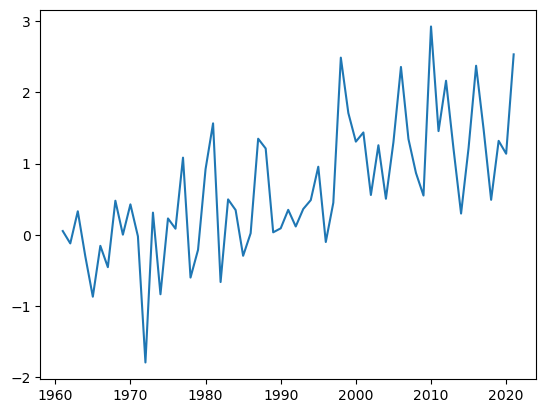

In [306]:
# Reference plot (to make sure I've used the right indexes)
# First Six Countries: Australia, Austria, Brazil, Bulgaria, Canada, China
Canada = df[df['country'] == 'Canada']
plt.plot(Canada['year'], Canada['temp_change'])
plt.show()

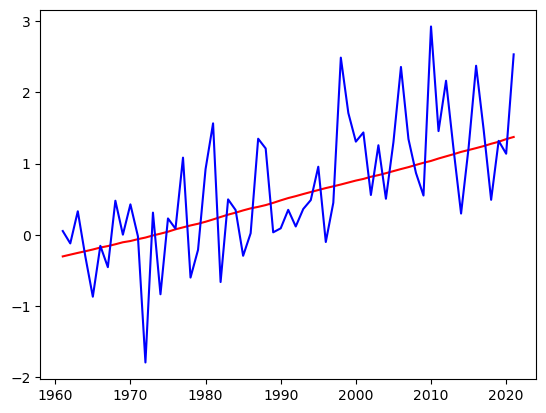

In [318]:
# Predicted Values vs Actual - Linear Regression Model
# First six index ranges: :51:102:153:204:255:306 and :10:20:30:40:50:60
years = range(1961,2022)
plt.plot(years, np.concatenate((y_train_pred[204:255], y_pred[40:50])), c='red')
plt.plot(years, np.concatenate((y_train[204:255], y_test[40:50])), c='blue')
plt.show()

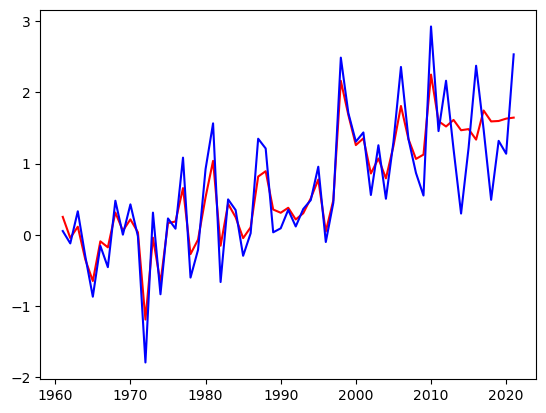

In [319]:
# Predicted Values vs Actual - Random Forest Regression Model
years = range(1961,2022)
plt.plot(years, np.concatenate((y_tree_train_pred[204:255], y_tree_pred[40:50])), c='red')
plt.plot(years, np.concatenate((y_train[204:255], y_test[40:50])), c='blue')
plt.show()

### Model Notes
    1. The linear regression model mostly looks good, though it may be underfitting in some instances
    2. The random forest regression model is definitely overfitting